**DIABETES PREDICTION**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd

Data Collection and Data Analysis

In [2]:
# Loading the dataset to pandas dataframe
diabetes_ds=pd.read_csv('diabetes.csv')

In [3]:
# Information about the DataFrame
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Print first 5 rows of dataset
diabetes_ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Print last 5 rows of dataset
diabetes_ds.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Number of rows and columns in the dataset
diabetes_ds.shape

(768, 9)

In [7]:
# Getting the statistical measures of the data (like mean,standard deviation etc..)
diabetes_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Number of missing values in the datset
diabetes_ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Target Variable Distribution
diabetes_ds['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Here

1 indicates diabetic and

0 indicates Non-diabetic

In [10]:
# Grouping data based on the target Variable
diabetes_ds.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Data Pre - Processing

In [11]:
# Separating the data and labels
X=diabetes_ds.drop(columns='Outcome',axis=1)

In [12]:
Y=diabetes_ds['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Using Matplotlib for plotting Histograms

In [15]:
import matplotlib.pyplot as plt

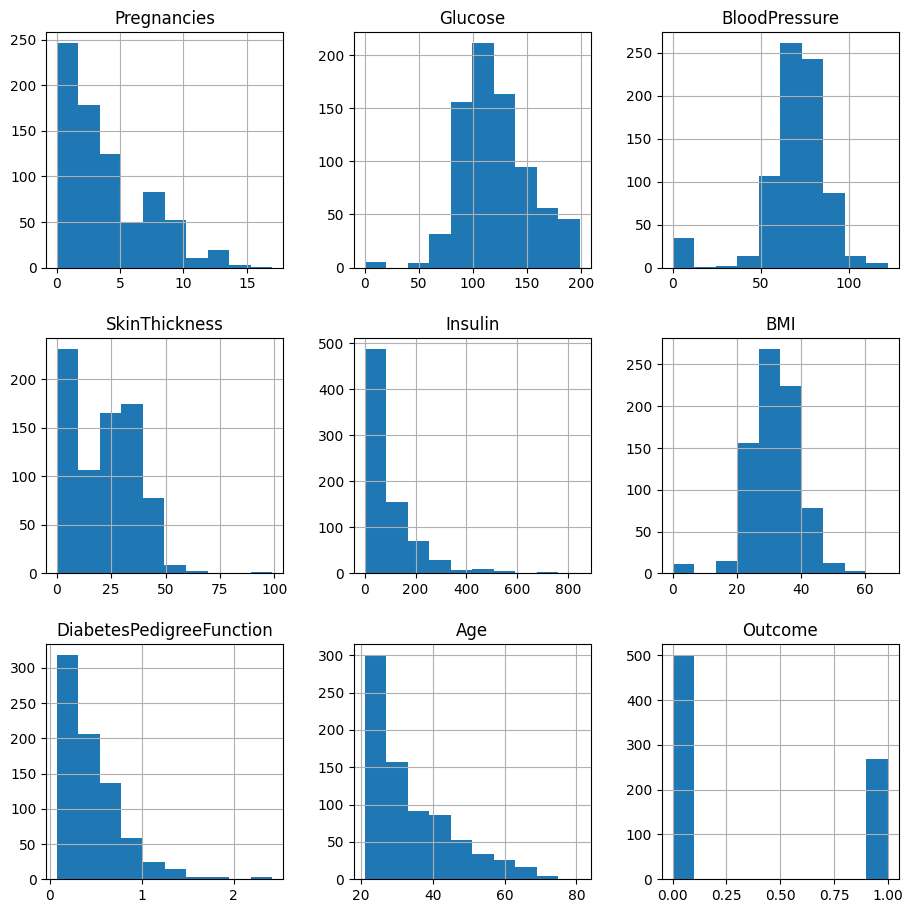

In [16]:
diabetes_ds.hist(figsize=(11,11))
plt.show()

Splitting the data into

Training data and

Testing data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [19]:
# Checking the shape of X_train and X_test
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

We are making use of Random Forest Classifier


In [21]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [22]:
#training the Random Forest Classifier model with Training data
clf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, random_state=42)

Model Evaluation

Used to check how many times our model is predicting correctly

In [23]:
from sklearn.metrics import accuracy_score

Calculating Accuracy Score

In [24]:
# accuracy score on the training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.996742671009772


In [26]:
# accuracy score on the testing data
X_test_prediction = clf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score of the testing data:',testing_data_accuracy)

Accuracy score of the testing data: 0.7597402597402597


Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,X_test_prediction)}")

Confusion Matrix =
 [[88 12]
 [25 29]]


Classification Report

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(f"Classification Report =\n{classification_report(Y_test,X_test_prediction)}")

Classification Report =
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



Building a Prediction System

In [32]:
input_data = (10,115,0,0,0,35.3,0.134,291)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = s.transform(input_data_reshaped)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('This person is not a diabetic person.')
else:
  print('This person is a diabetic person.')

[0]
This person is not a diabetic person.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the Trained Model

In [33]:
import pickle

In [34]:
fname='diabetes_model.sav'
pickle.dump(clf, open(fname, 'wb'))

In [35]:
#Loading the saved Model
load_model=pickle.load(open('diabetes_model.sav', 'rb'))

In [36]:
input_data = (7,107,74,0,0,29.6,0.254,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('This person is not a diabetic person.')
else:
  print('This person is a diabetic person.')

[1]
This person is a diabetic person.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**END OF DIABETES PREDICTION**